# ❓ <font color='green'> <u> PROBLEM STATEMENT (Emotion_mining) </u>

## <font color = 'navy'>Text Mining: 

### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

___

### <font color = 'magenta'> <u> STEPS WE PERFORM:</u>
    
* #### 1. Extracting review data from E-commerce website for a product.

* #### 2. Text Preprocessing:
    + Text Cleaning
    + Tokenization
    + Removal of Stopwards
    + Lemmatization
* #### 3. Feature Extraction (TF-IDF)
* #### 4. Visualisation (WordCloud)

___

 * ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup as bs

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* ### <font color = 'blue'> <u> WEB-SCRAPPING </u>
    
   + #### Here we will do Web-Scrapping for Extraction of our required data i.e. reviews of any product on any E-commerce website using BeautifulSoup Library.
   + #### Now let's extract the data of reviews on "SAMSUNG Galaxy S22 Plus 5G" from Flipkart.

In [14]:
Reviews = []

for i in range(1,54):
    url ="https://www.flipkart.com/samsung-galaxy-s22-plus-5g-green-128-gb/product-reviews/itmd68f588073a63?pid=MOBGGG2YKQNZPTGN&lid=LSTMOBGGG2YKQNZPTGNRC0MAL&marketplace=FLIPKART&page=" + str(i)
    r = requests.get(url)
    soup = bs(r.text)
    Box = soup.find("div", class_="_1YokD2 _3Mn1Gg col-9-12")
    if Box:
            reviews = Box.find_all("div", class_="t-ZTKy")
            for i in reviews:
                n = i.text
                Reviews.append(n)  

In [17]:
Reviews

['Amazing display. Camera is good.3x optical zoom is very helpful .Looks premium in green colour.READ MORE',
 'Pro grade camera, battery backup is slightly less. Rest overall Performance  are tremendous.READ MORE',
 'Camera experience is awesome, night mode is also pretty cool, video quality is out of the world, Phone Works like butter,Design feels premium , I very much like the matte finish in the back .. Green color is pretty sick 😬Main issue for me is not having the charger 😒Battery drains quite fast tho good for moderate use  P.s. Flipkart service is just dope..got delivered prior to estimated time 😘READ MORE',
 'I only have one word for it: Mind-blowing. If you can afford it, just go for it.READ MORE',
 'Excellent Dark photography in Normal Mode only.🥰Sometimes camera gets overexposed and is not able to cover Light areas, but after post processing, things are very sharp and clear.Also, got a 30x Moon Shot. 😍Selfie Camera could have been a little more than 10MP when investing in a 

In [15]:
print('Total Number of Reviews = ', len(Reviews))

Total Number of Reviews =  530


In [16]:
Reviews[0]

'Amazing display. Camera is good.3x optical zoom is very helpful .Looks premium in green colour.READ MORE'

___

* ### <font color = 'blue'> <u> TEXT-PREPROCESSING </u>

 ### <font color ='green'> ➡ <u>Text Cleaning : </u>

In [18]:
# Joining all the reviews together:
reviews_join = ' '.join(Reviews)

In [19]:
reviews_join[0]

'A'

In [58]:
# Keeping only characters and removing everything else
rew_upd = re.sub("[^A-Za-z]"," ",reviews_join).lower() 

In [59]:
rew_upd

'amazing display  camera is good  x optical zoom is very helpful  looks premium in green colour read more pro grade camera  battery backup is slightly less  rest overall performance  are tremendous read more camera experience is awesome  night mode is also pretty cool  video quality is out of the world  phone works like butter design feels premium   i very much like the matte finish in the back    green color is pretty sick  main issue for me is not having the charger  battery drains quite fast tho good for moderate use  p s  flipkart service is just dope  got delivered prior to estimated time  read more i only have one word for it  mind blowing  if you can afford it  just go for it read more excellent dark photography in normal mode only  sometimes camera gets overexposed and is not able to cover light areas  but after post processing  things are very sharp and clear also  got a   x moon shot   selfie camera could have been a little more than   mp when investing in a  gen  phone and g

In [60]:
len(rew_upd)

71566

### <font color ='green'> ➡ <u>Tokenization : </u>
    
#### Transforming paragraphs into sentences and then sentences into words and converting various forms of the same term into a common 'normalized' form.

In [29]:
tokens = word_tokenize(rew_upd)

In [30]:
len(tokens)

12392

### <font color ='green'> ➡ <u>Removing Stopwards : </u>

In [31]:
tokens_without_sw = [word for word in tokens if word not in stopwords.words()]

In [32]:
tokens_without_sw

['amazing',
 'display',
 'camera',
 'x',
 'optical',
 'zoom',
 'helpful',
 'premium',
 'green',
 'colour',
 'read',
 'pro',
 'grade',
 'camera',
 'battery',
 'backup',
 'slightly',
 'rest',
 'performance',
 'tremendous',
 'read',
 'camera',
 'experience',
 'awesome',
 'night',
 'pretty',
 'cool',
 'video',
 'quality',
 'world',
 'phone',
 'works',
 'butter',
 'design',
 'feels',
 'premium',
 'matte',
 'finish',
 'back',
 'green',
 'color',
 'pretty',
 'sick',
 'issue',
 'charger',
 'battery',
 'drains',
 'fast',
 'moderate',
 'p',
 'flipkart',
 'service',
 'dope',
 'delivered',
 'prior',
 'estimated',
 'time',
 'read',
 'word',
 'mind',
 'blowing',
 'afford',
 'read',
 'excellent',
 'dark',
 'photography',
 'normal',
 'camera',
 'overexposed',
 'cover',
 'light',
 'areas',
 'post',
 'processing',
 'things',
 'sharp',
 'clear',
 'x',
 'moon',
 'shot',
 'selfie',
 'camera',
 'mp',
 'investing',
 'gen',
 'phone',
 'greater',
 'price',
 'performance',
 'lets',
 'choose',
 'tier',
 'process

In [33]:
len(tokens_without_sw)

5585

### <font color ='green'> ➡ <u>Lemmatization : </u>
    
+ #### Decreasing variability of words by reducing different forms of words to their basic or root form. 
+ #### Lemmatization tries to complete the word into it's meaningfull form.


In [34]:
lemma = WordNetLemmatizer()

In [35]:
lam_tokens = []
for i in tokens_without_sw:
    n = lemma.lemmatize(i) 
    lam_tokens.append(n)

In [36]:
lam_tokens

['amazing',
 'display',
 'camera',
 'x',
 'optical',
 'zoom',
 'helpful',
 'premium',
 'green',
 'colour',
 'read',
 'pro',
 'grade',
 'camera',
 'battery',
 'backup',
 'slightly',
 'rest',
 'performance',
 'tremendous',
 'read',
 'camera',
 'experience',
 'awesome',
 'night',
 'pretty',
 'cool',
 'video',
 'quality',
 'world',
 'phone',
 'work',
 'butter',
 'design',
 'feel',
 'premium',
 'matte',
 'finish',
 'back',
 'green',
 'color',
 'pretty',
 'sick',
 'issue',
 'charger',
 'battery',
 'drain',
 'fast',
 'moderate',
 'p',
 'flipkart',
 'service',
 'dope',
 'delivered',
 'prior',
 'estimated',
 'time',
 'read',
 'word',
 'mind',
 'blowing',
 'afford',
 'read',
 'excellent',
 'dark',
 'photography',
 'normal',
 'camera',
 'overexposed',
 'cover',
 'light',
 'area',
 'post',
 'processing',
 'thing',
 'sharp',
 'clear',
 'x',
 'moon',
 'shot',
 'selfie',
 'camera',
 'mp',
 'investing',
 'gen',
 'phone',
 'greater',
 'price',
 'performance',
 'let',
 'choose',
 'tier',
 'processor',
 

In [37]:
len(lam_tokens)

5585

___

* ### <font color = 'blue'> <u> FEATURE EXTRACTION </u>
    
    + #### <font color = 'candy'> DIFFERENT TYPES:
    
    1. Binary Weights 
    2. Bag of Words
    3. TF-IDF
    
* #### Here we will use TF-IDF (Term Frequency- Inverse Document Frequency) cause it will tell us  not only occurance but also frequency of the word occuring.

In [38]:
tf = TfidfVectorizer()
x = tf.fit_transform(tokens_without_sw)

In [39]:
df = pd.DataFrame(x.toarray(), columns= tf.get_feature_names_out())
df

,absolute,absolutely,acceptable,acknowledged,activities,activity,actual,added,additionally,address,...,year,years,yearsread,youread,ypu,yrs,yt,zero,zoom,zooming
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
len(df)

5585

___

* ### <font color = 'blue'> <u> VISUALISATION </u>

### <font color ='green'> ➡ <u>Overall Review Words : </u>

In [41]:
txt_df = ' '.join(df)

(-0.5, 1199.5, 799.5, -0.5)

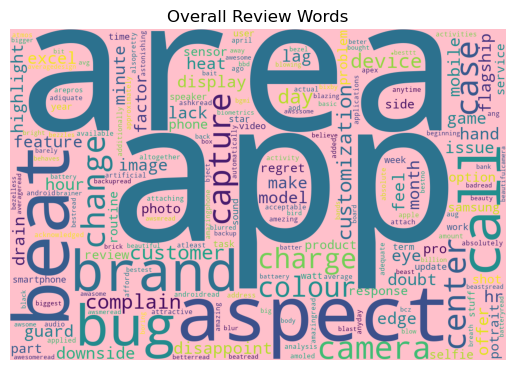

In [42]:
wc_rew = WordCloud(background_color='pink', width= 1200, height= 800).generate(txt_df)
plt.imshow(wc_rew)
plt.title('Overall Review Words')
plt.axis('off')

### <font color ='green'> ➡ <u>Positive Review Words : </u>

In [43]:
# Extracting text file of positive words:
with open("positive-words.txt") as pw:
    positive_words = pw.read().split("\n")

In [44]:
positive_words = positive_words[35:] 
# As the Words in text file starts from line 35
# Reference from : Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing and Comparing Opinions on the Web." Proceedings of the 14th International World Wide Web conference (WWW-2005), May 10-14, 2005, Chiba, Japan.

#### Notes: 
1. The appearance of an opinion word in a sentence does not necessarily mean that the sentence expresses a positive or negative opinion.
2. You will notice many misspelled words in the list. They are not mistakes. They are included as these misspelled words appear frequently in social media content.

In [45]:
len(positive_words) 

2007

In [46]:
# Common words in Reviews data and Positive words list :
positive_review = ' '.join([word for word in df if word in positive_words])

In [47]:
print("Number of positive words in reviews = ", len(positive_review))

Number of positive words in reviews =  1229


In [48]:
print("Percentage of postitive words in review = ",round((len(positive_review)/len(df))*100,2),"%")

Percentage of postitive words in review =  22.01 %


(-0.5, 999.5, 799.5, -0.5)

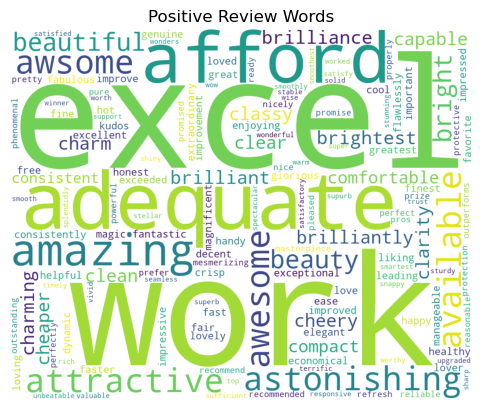

In [49]:
# WordCloud for Positive Words in Review:
wc_pos_rew = WordCloud(background_color='white', width=1000, height=800).generate(positive_review)
plt.imshow(wc_pos_rew)
plt.title('Positive Review Words')
plt.axis('off')

### <font color ='green'> ➡ <u>Negative Review Words : </u>

In [50]:
# Extracting text file of negative words:
with open("negative-words.txt", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [51]:
negative_words = negative_words[35:]

In [52]:
len(negative_words)

4784

In [53]:
# Common words in Reviews data and Negative words list :
negative_review = ' '.join([word for word in df if word in negative_words])

In [54]:
print("Number of negative words in reviews = ",len(negative_review))

Number of negative words in reviews =  821


In [55]:
print("Percentage of negative words in reviews = ",round((len(negative_review)/len(df))*100,2),"%")

Percentage of negative words in reviews =  14.7 %


(-0.5, 1199.5, 799.5, -0.5)

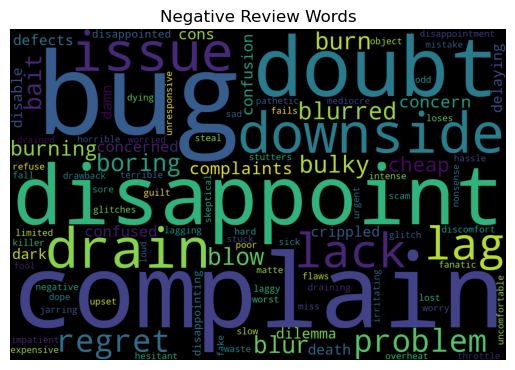

In [56]:
# WordCloud for Negative Words in Review:
wc_neg_rew = WordCloud(width= 1200, height= 800).generate(negative_review)
plt.imshow(wc_neg_rew)
plt.title('Negative Review Words')
plt.axis('off')

### <font color ='green'> ➡ <u>Comparing Percentage of Negative and Positive Words : </u>

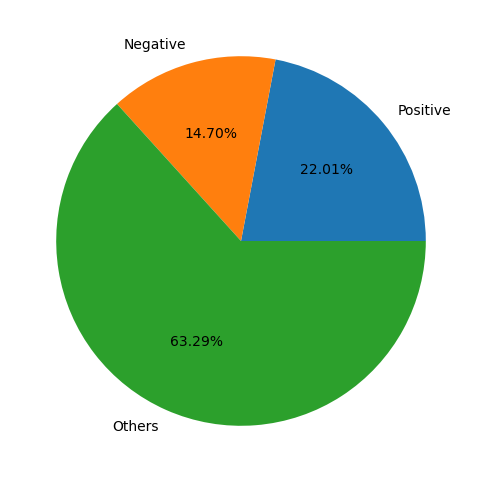

In [57]:
plt.figure(figsize=(10,6))
p = len(positive_review)
n = len(negative_review)
o = len(df)-(p+n)

plt.pie([p,n,o],
       labels= ['Positive','Negative','Others'],
       autopct= '%0.2f%%')
import warnings 
warnings.filterwarnings('ignore')

* ### <font color = 'blue'> <u> CONCLUSION </u>
    
    + #### As per given list of positive and negative words we observe that there are 22% of positive words in our reviews which is more than negative words(14.7%).
    + #### "Excel", "Work", "Adequate"," Afford" are some positive words majorly appears in our reviews data.
    + #### "Bug", "Complain", "Disappoint" are some negative words majorly appears in our data.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___